**Data Analysis**

First, let’s perform some basic data analysis to understand  dataset.



      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

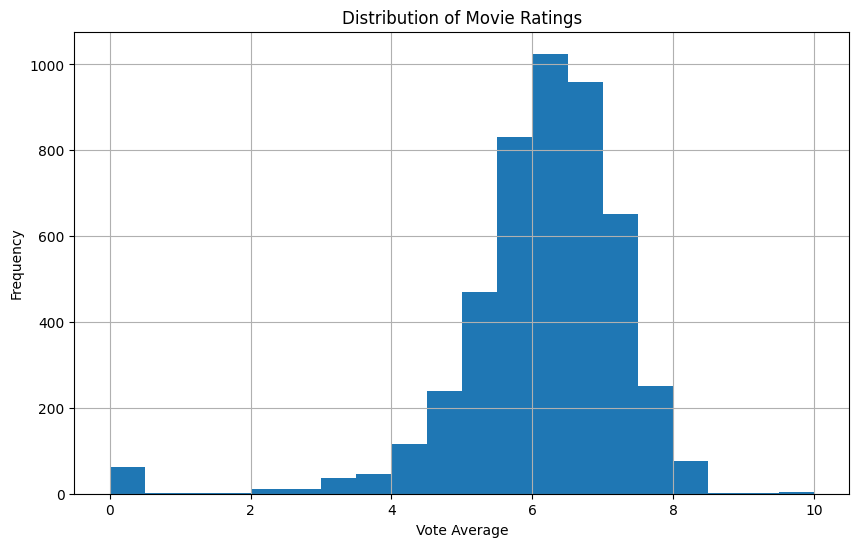

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
movies_df = pd.read_csv('movies.csv')

# Display the first few rows of the dataset
print(movies_df.head())

# Basic statistics
print(movies_df.describe())

# Check for missing values
print(movies_df.isnull().sum())

# Plot the distribution of movie ratings using 'vote_average'
plt.figure(figsize=(10, 6))
movies_df['vote_average'].hist(bins=20)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()


**Data Preprocessing**


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Convert genres into dummy variables
genres_dummies = movies_df['genres'].str.get_dummies(sep='|')

# Prepare input (X) and output (y) for the neural network
X = genres_dummies.values
y = LabelEncoder().fit_transform(movies_df['title'])  # Encoding movie titles as targets for simplicity

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))  # Dropout to prevent overfitting
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(set(y)), activation='softmax'))  # Output layer with softmax for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.0000e+00 - loss: 8.4814 - val_accuracy: 0.0000e+00 - val_loss: 8.5109
Epoch 2/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 7.9837e-04 - loss: 8.4469 - val_accuracy: 0.0000e+00 - val_loss: 8.7127
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0035 - loss: 8.2428 - val_accuracy: 0.0000e+00 - val_loss: 9.2573
Epoch 4/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0078 - loss: 7.7942 - val_accuracy: 0.0000e+00 - val_loss: 10.3135
Epoch 5/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0111 - loss: 7.3253 - val_accuracy: 0.0000e+00 - val_loss: 11.4447
Epoch 6/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0155 - loss: 6.8912 - val_accuracy: 0.0000e+00 - val_loss: 12.4723
Epoch 7/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0312 - loss: 6.4477 - val_accuracy: 0.0000e+00 - val_loss: 13.4397
Epoch 8/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.0435 -

**Evaluating the Neural Network**

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 15.1659
Test Accuracy: 0.0


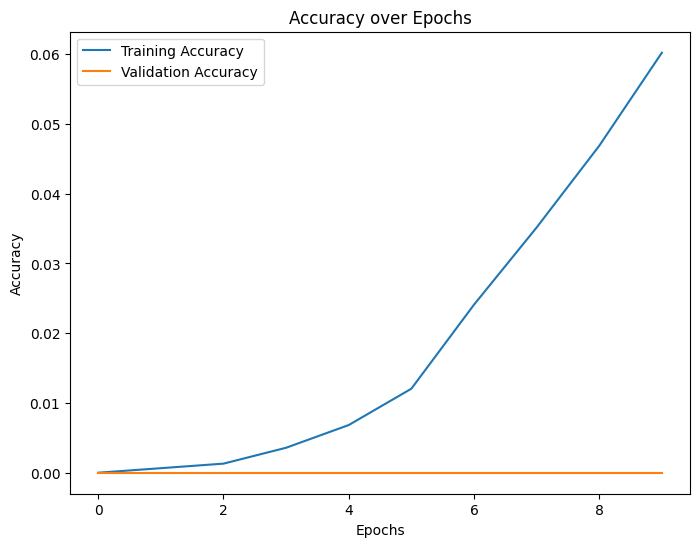

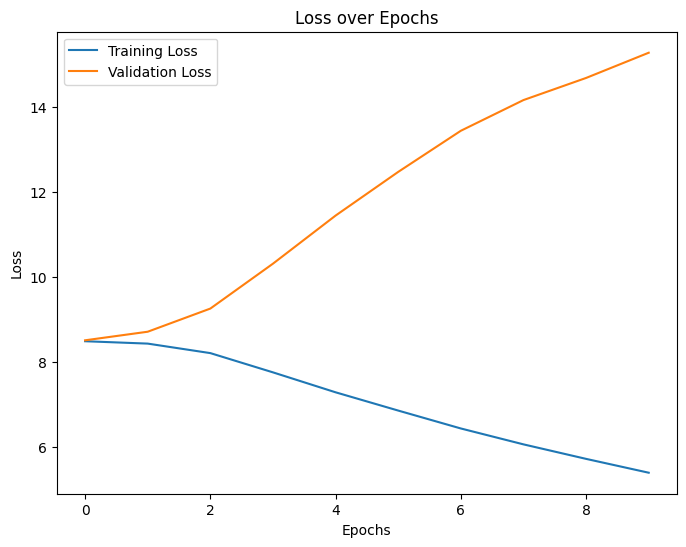

In [13]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Making Predictions**

In [15]:
# Properly fit the LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder with the movie titles
y = label_encoder.fit_transform(movies_df['title'])  # Encoding movie titles

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the Neural Network (same as before)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(set(y)), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model (same as before)
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluating the Neural Network (same as before)
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Perform inverse transformation using the fitted label encoder
predicted_titles = label_encoder.inverse_transform(y_pred.argmax(axis=1))

# Compare actual vs predicted movie titles
comparison_df = pd.DataFrame({'Actual Title': label_encoder.inverse_transform(y_test), 'Predicted Title': predicted_titles})

# Display the comparison
print(comparison_df.head(10))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.0000e+00 - loss: 8.4815 - val_accuracy: 0.0000e+00 - val_loss: 8.5109
Epoch 2/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 8.6658e-04 - loss: 8.4460 - val_accuracy: 0.0000e+00 - val_loss: 8.7212
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 1.2061e-04 - loss: 8.2278 - val_accuracy: 0.0000e+00 - val_loss: 9.2419
Epoch 4/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0050 - loss: 7.7828 - val_accuracy: 0.0000e+00 - val_loss: 10.3458
Epoch 5/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.0133 - loss: 7.2818 - val_accuracy: 0.0000e+00 - val_loss: 11.4178
Epoch 6/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0190 - loss: 6.8868 - val_accuracy: 0.0000e+00 - val_loss: 12.5916
Epoch 7/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0286 - loss: 6.4145 - val_accuracy: 0.0000e+00 - val_loss: 13.2677
Epoch 8/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.04

 **Enhancing the Content-Based Filtering Recommender**

We can now combine the neural network model with the content-based filtering approach we discussed earlier.

In [17]:
from sklearn.metrics.pairwise import cosine_similarity

# Define the movie indices (mapping of titles to DataFrame indices)
movie_indices = pd.Series(movies_df.index, index=movies_df['title']).drop_duplicates()

# Calculate the cosine similarity between genres
cosine_sim = cosine_similarity(genres_dummies)

# Recommend movies based on similar genres
def recommend_movies_nn(title, num_recommendations=5):
    if title not in movie_indices:
        print(f"Movie title '{title}' not found.")
        return []

    # Get the index of the movie that matches the title
    idx = movie_indices[title]

    # Get the pairwise similarity scores for all movies with the input movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the most similar movies
    sim_scores = sim_scores[1:num_recommendations+1]  # Exclude the first one (itself)

    # Get the movie indices and titles
    movie_indices_sim = [i[0] for i in sim_scores]
    recommended_titles = movies_df['title'].iloc[movie_indices_sim]

    return recommended_titles

# Example usage: Recommend 5 movies similar to "Toy Story"
print(recommend_movies_nn('Toy Story', 5))


231                       Monsters, Inc.
318                            Surf's Up
343                          Toy Story 2
347    Cloudy with a Chance of Meatballs
464                 Hotel Transylvania 2
Name: title, dtype: object
